In [2]:
import torch
import torch.nn as nn

# Torch Tensor

In [23]:
x = torch.tensor([1, 2, 3],dtype=torch.float32)
print(x)

tensor([1., 2., 3.])


In [24]:
a = torch.zeros(3, 3)      # 3x3 sıfırlardan oluşan tensor
b = torch.ones(2, 4)       # 2x4 birlerden oluşan tensor
c = torch.rand(2, 3)       # 2x3 [0,1) arası rastgele sayı
d = torch.arange(0, 10, 2) # 0'dan 10'a kadar 2’şer artış

In [27]:
t = torch.rand(3, 4, 5)  
print(t.shape)   # (3, 4, 5)
print(t.ndim)    # 3 boyut
print(t.dtype)   # default float32

torch.Size([3, 4, 5])
3
torch.float32


In [28]:
x = torch.arange(10)  # [0,1,2,...,9]
print(x[0])    # ilk eleman
print(x[-1])   # son eleman
print(x[2:7])  # slicing

mat = torch.arange(16).reshape(4,4)
print(mat[1, :])   # 1. satır
print(mat[:, 2])   # 2. sütun

tensor(0)
tensor(9)
tensor([2, 3, 4, 5, 6])
tensor([4, 5, 6, 7])
tensor([ 2,  6, 10, 14])


In [31]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

print(a + b)       # toplama
print(a * b)       # çarpma (eleman bazlı)
print(torch.dot(a.float(), b.float())) # dot product

tensor([5, 7, 9])
tensor([ 4, 10, 18])
tensor(32.)


In [33]:
M = torch.tensor([[1., 2.], [3., 4.]])
v = torch.tensor([1., 0.])

print(M @ v)                # matris çarpımı
print(torch.matmul(M, v))   # matris çarpımı
print(M.T)                  # transpoz

tensor([1., 3.])
tensor([1., 3.])
tensor([[1., 3.],
        [2., 4.]])


In [34]:
x = torch.arange(6)         # [0,1,2,3,4,5]
print(x.view(2,3))          # reshape

y = torch.rand(1,3,1,4)
print(y.squeeze().shape)    # boyutu 1 olan eksenleri atar
print(y.unsqueeze(0).shape) # yeni eksen ekler

tensor([[0, 1, 2],
        [3, 4, 5]])
torch.Size([3, 4])
torch.Size([1, 1, 3, 1, 4])


# Activation functions

## Threshold like

In [3]:
from torch.nn import Threshold
threshold_af = Threshold(threshold=10,value=-1)
print(threshold_af(torch.tensor(11)))
print(threshold_af(torch.tensor(9)))

tensor(11)
tensor(-1)


In [7]:
from torch.nn import Hardshrink,Softshrink,Tanhshrink
print("Hardshrink")
af = Hardshrink(lambd=0.5)
print(af(torch.tensor(0.3)))
print(af(torch.tensor(0.6)))

print("\nSoftShrink")
af = Softshrink(lambd=0.5)
print(af(torch.tensor(0.3)))
print(af(torch.tensor(10.)))

print("\ntanhshrink")
af = Tanhshrink()
print(af(torch.tensor(0.00000005)))
print(af(torch.tensor(0.3)))
print(af(torch.tensor(0.6)))

Hardshrink
tensor(0.)
tensor(0.6000)

SoftShrink
tensor(0.)
tensor(9.5000)

tanhshrink
tensor(0.)
tensor(0.0087)
tensor(0.0630)


## Sigmoid like

In [3]:
from torch.nn import Sigmoid
sigmoid_af = Sigmoid()
print(sigmoid_af(torch.tensor(-5)))
print(sigmoid_af(torch.tensor(0)))
print(sigmoid_af(torch.tensor(10)))

tensor(0.0067)
tensor(0.5000)
tensor(1.0000)


In [6]:
from torch.nn import LogSigmoid
af = LogSigmoid()
print(af(torch.tensor(-5,dtype=torch.float32)))
print(af(torch.tensor(0,dtype=torch.float32)))
print(af(torch.tensor(10,dtype=torch.float32)))

tensor(-5.0067)
tensor(-0.6931)
tensor(-4.5399e-05)


In [7]:
from torch.nn import Tanh
af = Tanh()
print(af(torch.tensor(-5,dtype=torch.float32)))
print(af(torch.tensor(0,dtype=torch.float32)))
print(af(torch.tensor(10,dtype=torch.float32)))

tensor(-0.9999)
tensor(0.)
tensor(1.)


In [9]:
from torch.nn import Hardsigmoid,Hardtanh
af = Hardsigmoid()
print(af(torch.tensor(-5,dtype=torch.float32)))
print(af(torch.tensor(0,dtype=torch.float32)))
print(af(torch.tensor(10,dtype=torch.float32)))

af = Hardtanh()
print(af(torch.tensor(-5,dtype=torch.float32)))
print(af(torch.tensor(0,dtype=torch.float32)))
print(af(torch.tensor(10,dtype=torch.float32)))

tensor(0.)
tensor(0.5000)
tensor(1.)
tensor(-1.)
tensor(0.)
tensor(1.)


## Softmax like

In [10]:
from torch.nn import Softmax,LogSoftmax
softmax_af = Softmax(dim=0)
logsoftmax_af = LogSoftmax(dim=0)
print(softmax_af(torch.tensor([2.0,1.0,0.1])))
print(logsoftmax_af(torch.tensor([2.0,1.0,0.1])))

tensor([0.6590, 0.2424, 0.0986])
tensor([-0.4170, -1.4170, -2.3170])


In [11]:
from torch.nn import Softmin
af = Softmin(dim=0)
print(af(torch.tensor([2.0,1.0,0.1])))

tensor([0.0961, 0.2613, 0.6426])


## ReLU like

In [13]:
from torch.nn import ReLU
relu_af = ReLU()
print(relu_af(torch.tensor(11)))
print(relu_af(torch.tensor(0)))

tensor(11)
tensor(0)


In [14]:
from torch.nn import ReLU,ReLU6,RReLU,PReLU,LeakyReLU,Softplus,GELU,SiLU,Hardswish,Mish
relu_af = LeakyReLU()
print(relu_af(torch.tensor(11,dtype=torch.float32)))
print(relu_af(torch.tensor(-1,dtype=torch.float32)))

tensor(11.)
tensor(-0.0100)


## ELU like

In [4]:
from torch.nn import ELU,SELU,CELU
af = ELU(alpha=1.0)
print(af(torch.tensor(11,dtype=torch.float32)))
print(af(torch.tensor(-1,dtype=torch.float32)))

af = SELU()
print(af(torch.tensor(11,dtype=torch.float32)))
print(af(torch.tensor(-1,dtype=torch.float32)))

af = CELU(alpha=1.0)
print(af(torch.tensor(11,dtype=torch.float32)))
print(af(torch.tensor(-1,dtype=torch.float32)))

tensor(11.)
tensor(-0.6321)
tensor(11.5577)
tensor(-1.1113)
tensor(11.)
tensor(-0.6321)


# Simple Neural Network

In [8]:
import torch.nn as nn
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)
    
model = SimpleNN()
output = model(torch.tensor([1.0,2.0]))
print(output)

tensor([0.4470], grad_fn=<SigmoidBackward0>)


In [10]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x
    
model = SimpleNN()
output = model(torch.tensor([1.0,2.0]))
print(output)

tensor([0.4010], grad_fn=<SigmoidBackward0>)


# Backpropagation

In [12]:
import torch
import torch.nn as nn

x = torch.tensor([[1.0, 2.0]]) 
y_true = torch.tensor([[1.0]])

class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 2, bias=False)
        self.fc2 = nn.Linear(2, 1, bias=False)

        with torch.no_grad():
            self.fc1.weight.copy_(torch.tensor([[0.1, 0.2],
                                                [0.3, 0.4]]))
            self.fc2.weight.copy_(torch.tensor([[0.5, 0.6]]))

    def forward(self, x):
        x = self.fc1(x)          
        x = self.fc2(x)
        x = torch.relu(x)
        return x


model = SimpleNN()
criterion = nn.MSELoss()

y_pred = model(x)
loss = 0.5 * criterion(y_pred, y_true)

loss.backward()

# 6. Gradyanlar
print("fc1 weight gradients (∂L/∂w1):")
print(model.fc1.weight.grad)

print("\nfc2 weight gradients (∂L/∂w2):")
print(model.fc2.weight.grad)

print("\nPrediction:", y_pred.item())
print("Loss:", loss.item())


fc1 weight gradients (∂L/∂w1):
tensor([[-0.0450, -0.0900],
        [-0.0540, -0.1080]])

fc2 weight gradients (∂L/∂w2):
tensor([[-0.0450, -0.0990]])

Prediction: 0.9100000262260437
Loss: 0.00404999777674675


# Loss Functions in Torch

In [13]:
from torch.nn import MSELoss,L1Loss,HuberLoss
MSE = MSELoss()
L1 = L1Loss()
huber = HuberLoss()

In [14]:
from torch.nn import BCELoss,BCEWithLogitsLoss
BCE = BCELoss()
BCE_logit = BCEWithLogitsLoss()

In [19]:
from torch.nn import CrossEntropyLoss,NLLLoss
ce = CrossEntropyLoss()
nll = NLLLoss()

x_logit = torch.tensor([[2.0,1.0,0.1]],dtype=torch.float32)
x = torch.tensor([[-0.4170, -1.4170, -2.3170]],dtype=torch.float32,requires_grad=True)
y = torch.tensor([0])

print(nll(x,y))
print(ce(x_logit,y))

tensor(0.4170, grad_fn=<NllLossBackward0>)
tensor(0.4170)


# Optimizers

## SGD - Momentum - ASGD

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Linear(10, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.1)

x = torch.randn(20, 10)
y = torch.randn(20, 1)

for epoch in range(5):
    model.train()
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")

Epoch 1 - Loss: 1.6148
Epoch 2 - Loss: 1.5745
Epoch 3 - Loss: 1.5363
Epoch 4 - Loss: 1.5000
Epoch 5 - Loss: 1.4655


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Linear(10, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)

x = torch.randn(20, 10)
y = torch.randn(20, 1)

for epoch in range(5):
    model.train()
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")

Epoch 1 - Loss: 1.0142
Epoch 2 - Loss: 1.0037
Epoch 3 - Loss: 0.9848
Epoch 4 - Loss: 0.9605
Epoch 5 - Loss: 0.9337


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Linear(10, 1)
criterion = nn.MSELoss()
optimizer = optim.ASGD(model.parameters(),lr=0.01,t0=3)

x = torch.randn(20, 10)
y = torch.randn(20, 1)

for epoch in range(5):
    model.train()
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")

    for i, param in enumerate(model.parameters()):
        state = optimizer.state[param]
        step = state.get('step', 0)
        t0 = optimizer.param_groups[0].get('t0', 1)
        averaging_started = step >= t0
        print(f"Epoch {epoch+1}, Param {i}: step={step}, averaging started={averaging_started}")

Epoch 1 - Loss: 1.8399
Epoch 1, Param 0: step=1.0, averaging started=False
Epoch 1, Param 1: step=1.0, averaging started=False
Epoch 2 - Loss: 1.7920
Epoch 2, Param 0: step=2.0, averaging started=False
Epoch 2, Param 1: step=2.0, averaging started=False
Epoch 3 - Loss: 1.7479
Epoch 3, Param 0: step=3.0, averaging started=True
Epoch 3, Param 1: step=3.0, averaging started=True
Epoch 4 - Loss: 1.7073
Epoch 4, Param 0: step=4.0, averaging started=True
Epoch 4, Param 1: step=4.0, averaging started=True
Epoch 5 - Loss: 1.6699
Epoch 5, Param 0: step=5.0, averaging started=True
Epoch 5, Param 1: step=5.0, averaging started=True


## AdaGrad - RMSProp - Adadelta

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Linear(10, 1)
criterion = nn.MSELoss()
optimizer = optim.Adagrad(model.parameters(),lr=0.01, initial_accumulator_value=0.0)

x = torch.randn(20, 10)
y = torch.randn(20, 1)

for epoch in range(5):
    model.train()
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")

Epoch 1 - Loss: 1.7048
Epoch 2 - Loss: 1.6228
Epoch 3 - Loss: 1.5687
Epoch 4 - Loss: 1.5265
Epoch 5 - Loss: 1.4914


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Linear(10, 1)
criterion = nn.MSELoss()
optimizer = optim.RMSprop(model.parameters(),lr=0.01,momentum=0.9)

x = torch.randn(20, 10)
y = torch.randn(20, 1)

for epoch in range(5):
    model.train()
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")

Epoch 1 - Loss: 0.8090
Epoch 2 - Loss: 0.6581
Epoch 3 - Loss: 0.6490
Epoch 4 - Loss: 0.6151
Epoch 5 - Loss: 0.5714


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Linear(10, 1)
criterion = nn.MSELoss()
optimizer = optim.Adadelta(model.parameters(),lr=0.01,rho=0.9)

x = torch.randn(20, 10)
y = torch.randn(20, 1)

for epoch in range(5):
    model.train()
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")

Epoch 1 - Loss: 1.6059
Epoch 2 - Loss: 1.6056
Epoch 3 - Loss: 1.6054
Epoch 4 - Loss: 1.6051
Epoch 5 - Loss: 1.6048


## Adam - AdamW - Adafactor

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Linear(10, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.01,betas=(0.9,0.99))

x = torch.randn(20, 10)
y = torch.randn(20, 1)

for epoch in range(5):
    model.train()
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")

Epoch 1 - Loss: 2.5588
Epoch 2 - Loss: 2.4489
Epoch 3 - Loss: 2.3427
Epoch 4 - Loss: 2.2403
Epoch 5 - Loss: 2.1417


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Linear(10, 1)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(),lr=0.01,betas=(0.9,0.99),weight_decay=0.2)

x = torch.randn(20, 10)
y = torch.randn(20, 1)

for epoch in range(5):
    model.train()
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")

Epoch 1 - Loss: 2.2088
Epoch 2 - Loss: 2.1342
Epoch 3 - Loss: 2.0635
Epoch 4 - Loss: 1.9968
Epoch 5 - Loss: 1.9340


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Linear(10, 1)
criterion = nn.MSELoss()
optimizer = optim.Adafactor(model.parameters(),lr=0.01)

x = torch.randn(20, 10)
y = torch.randn(20, 1)

for epoch in range(5):
    model.train()
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")

Epoch 1 - Loss: 2.3867
Epoch 2 - Loss: 2.3676
Epoch 3 - Loss: 2.3489
Epoch 4 - Loss: 2.3306
Epoch 5 - Loss: 2.3126


# Linear Layers

In [13]:
from torch.nn import Linear,LazyLinear
import torch

linear = Linear(in_features=3,out_features=2)
print(linear(torch.tensor([1,2,3],dtype=torch.float32)))

lazy_linear = LazyLinear(out_features=2)
print(lazy_linear.parameters)
print(lazy_linear(torch.tensor([1,2,3],dtype=torch.float32)))
print(lazy_linear.parameters)

tensor([-0.6380,  0.3433], grad_fn=<ViewBackward0>)
<bound method Module.parameters of LazyLinear(in_features=0, out_features=2, bias=True)>
tensor([0.2533, 2.0513], grad_fn=<ViewBackward0>)
<bound method Module.parameters of Linear(in_features=3, out_features=2, bias=True)>


In [14]:
from torch.nn import Identity
import torch

identity = Identity()
identity(torch.tensor([1,2,3]))

tensor([1, 2, 3])

# Normalization Layer

In [16]:
import torch
import torch.nn as nn

x = torch.tensor([
    [1.0, 2.0, 3.0],
    [2.0, 3.0, 4.0],
    [3.0, 4.0, 5.0],
    [4.0, 5.0, 6.0]
])

bn = nn.BatchNorm1d(num_features=3)
print(bn.weight,bn.bias)
bn.train()
out = bn(x)
print("BatchNorm sonrası çıktı:\n", out)
print(torch.var(out,dim=0))
print(torch.mean(out,dim=0))

Parameter containing:
tensor([1., 1., 1.], requires_grad=True) Parameter containing:
tensor([0., 0., 0.], requires_grad=True)
BatchNorm sonrası çıktı:
 tensor([[-1.3416, -1.3416, -1.3416],
        [-0.4472, -0.4472, -0.4472],
        [ 0.4472,  0.4472,  0.4472],
        [ 1.3416,  1.3416,  1.3416]], grad_fn=<NativeBatchNormBackward0>)
tensor([1.3333, 1.3333, 1.3333], grad_fn=<VarBackward0>)
tensor([ 5.9605e-08, -5.9605e-08,  5.9605e-08], grad_fn=<MeanBackward1>)


# Dropout

Girdi:
tensor([-2.0274, -1.4799, -2.0106, -0.0581,  1.1067,  0.0355, -0.0645,  1.6369,
        -0.0342, -0.5075,  0.0075, -1.2198,  0.9939, -0.0023,  1.4923, -0.2790,
         0.2863, -1.8746,  1.5853,  0.7123])
Çıktı (Dropout sonrası):
tensor([-2.0274, -1.4799, -2.0106, -0.0581,  1.1067,  0.0355, -0.0645,  1.6369,
        -0.0342, -0.5075,  0.0075, -1.2198,  0.9939, -0.0023,  1.4923, -0.2790,
         0.2863, -1.8746,  1.5853,  0.7123])
Mask (1: geçti, 0: sıfırlandı):
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])


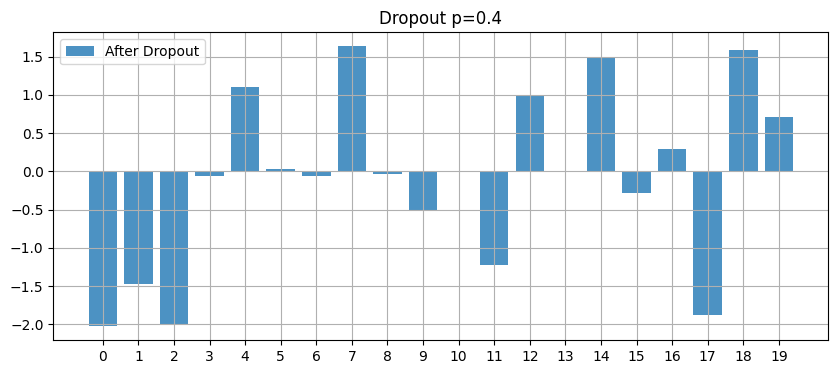

In [22]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

p = 0.4
dropout = nn.Dropout(p=p)
x = torch.randn(20)

#dropout.train()
dropout.eval()

out = dropout(x)
mask = (out != 0).float()

print(f"Girdi:\n{x}")
print(f"Çıktı (Dropout sonrası):\n{out}")
print(f"Mask (1: geçti, 0: sıfırlandı):\n{mask}")

plt.figure(figsize=(10, 4))
plt.bar(range(len(out)), out, alpha=0.8, label='After Dropout')
plt.xticks(range(len(x)))
plt.legend()
plt.title(f"Dropout p={p}")
plt.grid(True)
plt.show()


# Weight init

In [1]:
import torch
import torch.nn as nn
import torch.nn.init as init

class SimpleFC(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.initialize_weights()
        
    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                # ---------- LeCun Initialization ----------
                fan_in = m.weight.size(1)
                init.normal_(m.weight, mean=0.0, std=(1/fan_in)**0.5)
                init.zeros_(m.bias)
                
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleFC(input_dim=16, hidden_dim=32, output_dim=8)
print(model)


SimpleFC(
  (fc1): Linear(in_features=16, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=8, bias=True)
)


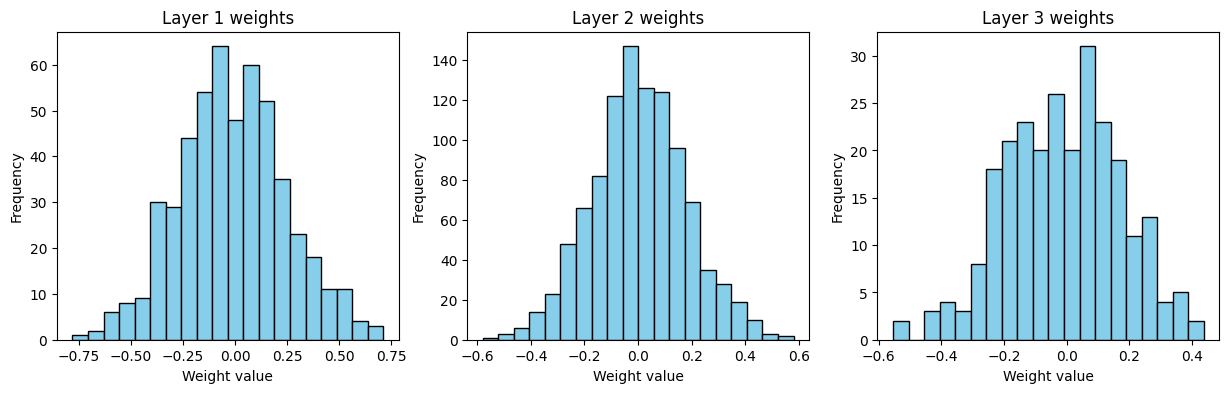

In [2]:
import matplotlib.pyplot as plt
layers = [m for m in model.modules() if isinstance(m, nn.Linear)]
plt.figure(figsize=(15,4))
for i, layer in enumerate(layers):
    weights = layer.weight.detach().cpu().numpy().flatten()
    plt.subplot(1, len(layers), i+1)
    plt.hist(weights, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Layer {i+1} weights')
    plt.xlabel('Weight value')
    plt.ylabel('Frequency')

In [3]:
import torch
import torch.nn as nn
import torch.nn.init as init

class SimpleFC(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.initialize_weights()
        
    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                # ---------- Xavier (Glorot) Initialization ----------
                fan_in = m.weight.size(1)
                fan_out = m.weight.size(0)
                limit = (6 / (fan_in + fan_out))**0.5
                init.uniform_(m.weight, -limit, limit)
                
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleFC(input_dim=16, hidden_dim=32, output_dim=8)
print(model)


SimpleFC(
  (fc1): Linear(in_features=16, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=8, bias=True)
)


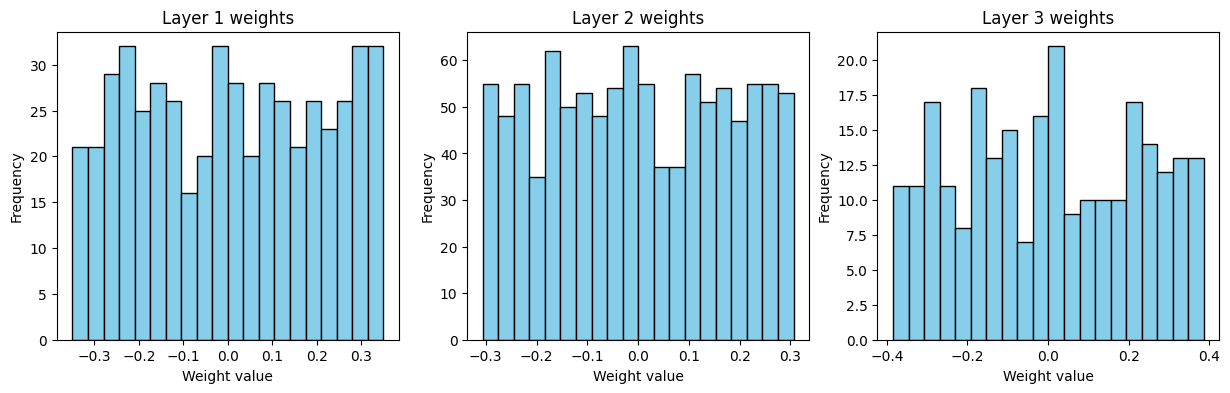

In [4]:
import matplotlib.pyplot as plt
layers = [m for m in model.modules() if isinstance(m, nn.Linear)]
plt.figure(figsize=(15,4))
for i, layer in enumerate(layers):
    weights = layer.weight.detach().cpu().numpy().flatten()
    plt.subplot(1, len(layers), i+1)
    plt.hist(weights, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Layer {i+1} weights')
    plt.xlabel('Weight value')
    plt.ylabel('Frequency')

In [6]:
import torch
import torch.nn as nn
import torch.nn.init as init

class SimpleFC(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.initialize_weights()
        
    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                # ---------- He Initialization ----------
                fan_in = m.weight.size(1)
                init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
                init.zeros_(m.bias)
                
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleFC(input_dim=16, hidden_dim=32, output_dim=8)
print(model)


SimpleFC(
  (fc1): Linear(in_features=16, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=8, bias=True)
)


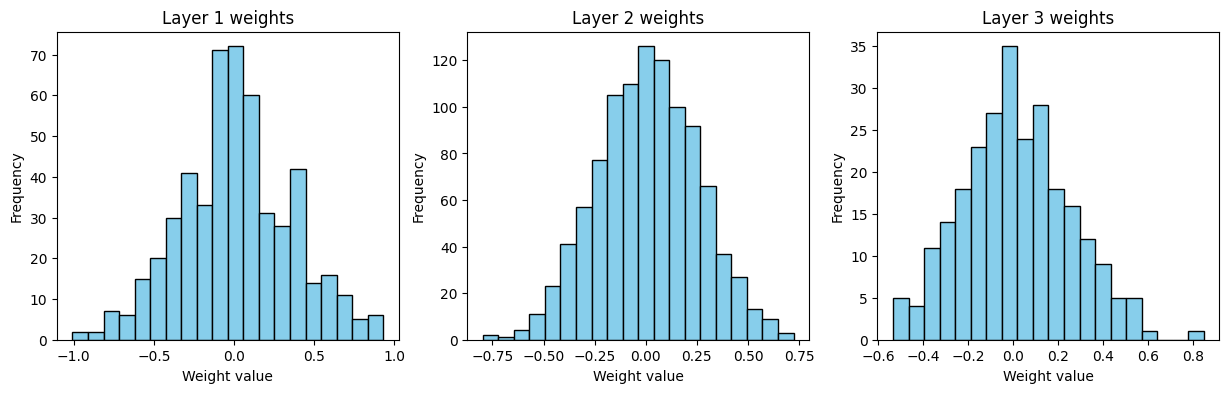

In [7]:
import matplotlib.pyplot as plt
layers = [m for m in model.modules() if isinstance(m, nn.Linear)]
plt.figure(figsize=(15,4))
for i, layer in enumerate(layers):
    weights = layer.weight.detach().cpu().numpy().flatten()
    plt.subplot(1, len(layers), i+1)
    plt.hist(weights, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Layer {i+1} weights')
    plt.xlabel('Weight value')
    plt.ylabel('Frequency')

# Learning Rate Schedulers

In [8]:
import torch.optim as optim
import torch.nn as nn
model = nn.Linear(10, 1)
initial_lr = 0.1
optimizer = optim.SGD(model.parameters(), lr=initial_lr)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=initial_lr)
step_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
for epoch in range(50):
    optimizer.step()
    step_scheduler.step()
    print(f"epoch:{epoch} Learning Rate:{optimizer.param_groups[0]["lr"]}")

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=initial_lr)
milestones = [15, 30, 40]
multistep_scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=0.5)
for epoch in range(50):
    optimizer.step()
    multistep_scheduler.step()
    print(f"epoch:{epoch} Learning Rate:{optimizer.param_groups[0]["lr"]}")

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=initial_lr)
exp_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
for epoch in range(50):
    optimizer.step()
    exp_scheduler.step()
    print(f"epoch:{epoch} Learning Rate:{optimizer.param_groups[0]["lr"]}")


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=initial_lr)
scheduler = optim.lr_scheduler.PolynomialLR(optimizer,total_iters=10,power=2)
for epoch in range(10):
    optimizer.step()
    scheduler.step()
    print(f"epoch:{epoch} Learning Rate:{optimizer.param_groups[0]["lr"]}")

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=initial_lr)
scheduler = optim.lr_scheduler.LinearLR(optimizer,start_factor=0.1,end_factor=1.0,total_iters=10)
for epoch in range(15):
    optimizer.step()
    scheduler.step()
    print(f"epoch:{epoch} Learning Rate:{optimizer.param_groups[0]["lr"]}")

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=initial_lr)
scheduler = optim.lr_scheduler.ConstantLR(optimizer,factor=0.5,total_iters=10)
for epoch in range(15):
    optimizer.step()
    scheduler.step()
    print(f"epoch:{epoch} Learning Rate:{optimizer.param_groups[0]["lr"]}")

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=initial_lr)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50, eta_min=0)
for epoch in range(100):
    optimizer.step()
    scheduler.step()
    print(f"epoch:{epoch} Learning Rate:{optimizer.param_groups[0]["lr"]}")

In [ ]:
param = torch.nn.Parameter(torch.randn(1))
optimizer = optim.SGD([param], lr=0.1)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=3, min_lr=0.001
)
val_losses = [0.9, 0.8, 0.7, 0.6, 0.55] + [0.55]*10 + [0.5, 0.45, 0.4, 0.35]
lrs = []
epochs = len(val_losses)
for epoch in range(epochs):
    val_loss = val_losses[epoch]
    scheduler.step(val_loss)
    lr = optimizer.param_groups[0]['lr']
    lrs.append(lr)
    print(f"Epoch {epoch+1:02d}: val_loss={val_loss:.3f}, lr={lr:.5f}")

In [17]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

model_param = torch.nn.Parameter(torch.randn(1))

optimizer = optim.SGD([model_param], lr=0.1)
step_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)
cosine_scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)
scheduler = optim.lr_scheduler.SequentialLR(
    optimizer,
    schedulers=[step_scheduler, cosine_scheduler],
    milestones=[5]
)

lrs = []
total_epochs = 15

for epoch in range(total_epochs):
    lrs.append(optimizer.param_groups[0]['lr'])
    print(f"Epoch {epoch+1}: LR = {optimizer.param_groups[0]['lr']:.5f}")
    optimizer.step()
    scheduler.step()

Epoch 1: LR = 0.10000
Epoch 2: LR = 0.10000
Epoch 3: LR = 0.05000
Epoch 4: LR = 0.05000
Epoch 5: LR = 0.02500
Epoch 6: LR = 0.10000
Epoch 7: LR = 0.09755
Epoch 8: LR = 0.09045
Epoch 9: LR = 0.07939
Epoch 10: LR = 0.06545
Epoch 11: LR = 0.05000
Epoch 12: LR = 0.03455
Epoch 13: LR = 0.02061
Epoch 14: LR = 0.00955
Epoch 15: LR = 0.00245


/home/ozgur/Desktop/Eğitim/.venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:198: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


# Dataset - Dataloader

In [36]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [37]:
X_np = np.random.rand(100, 10).astype(np.float32)
y_np = np.random.randint(0, 2, size=(100,)).astype(np.int64)

In [40]:
class NumpyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
dataset = NumpyDataset(X_np, y_np)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

for batch_X, batch_y in dataloader:
    print(batch_X.shape, batch_y.shape)

In [45]:
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

ModuleNotFoundError: No module named 'torchvision'

# GPU - CUDA

In [2]:
import torch
import torch.nn as nn

In [3]:
print(torch.cuda.is_available())  # Returns True if GPU is available
print(torch.cuda.device_count())  # Number of GPUs
print(torch.cuda.current_device()) # Current GPU device index
print(torch.cuda.get_device_name(0))  # Name of GPU 0

True
1
0
NVIDIA GeForce RTX 4060 Laptop GPU


In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [6]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(10000, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)
    
model = SimpleNN().to(device)

In [ ]:
data = torch.randn(100000, 10000)
data = data.to(device)

In [8]:
output = model(data)

# Reproducibility

In [14]:
x1 = torch.randn(3, 3)
print(x1)

tensor([[ 0.4368,  0.2115,  0.2421],
        [ 0.9547, -0.9362,  1.4641],
        [ 0.0573,  1.4288, -0.2554]])


In [35]:
torch.manual_seed(42)
x1 = torch.randn(3, 3)
print(x1)

tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863],
        [ 2.2082, -0.6380,  0.4617]])


In [37]:
import os
import random
import numpy as np
import torch

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED) #Tek GPU
torch.cuda.manual_seed_all(SEED) #Multiple GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.use_deterministic_algorithms(True)
os.environ["PYTHONHASHSEED"] = str(SEED)

# Torchmetrics

In [1]:
from torchmetrics import Accuracy,F1Score,Precision,AUROC
import torch

In [3]:
acc = Accuracy(task="binary",threshold=0.5)
acc(torch.tensor([0,0,1]),torch.tensor([0,1,0]))

tensor(0.3333)

# Saving-Loading Model

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MyModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = MyModel(input_dim=10, hidden_dim=32, output_dim=1)

In [6]:
torch.save(model.state_dict(), 'model_weights.pth')

In [7]:
model = MyModel(input_dim=10, hidden_dim=32, output_dim=1)
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

MyModel(
  (fc1): Linear(in_features=10, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=1, bias=True)
)

In [8]:
torch.save(model, 'entire_model.pth')

In [ ]:
model = torch.load('entire_model.pth',weights_only=False)
model.eval()

MyModel(
  (fc1): Linear(in_features=10, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=1, bias=True)
)